# Test


In [2]:
import sqlite3 
import os
import pandas as pd

### "Pre processing" the data 
it would be great to have the file path with it in each data frame
(this is nearly identical to what Anna is doing)

In [3]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\farah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_excel('content\ground_truth\data.xlsx')
ground_truth_df = df[['Study_ID', 'Study', 'Allocation', 'Experimenter']]
ground_truth_df

,Study_ID,Study,Allocation,Experimenter
0,1,Chacko et al 2017,Random,Parent
1,1,Chacko et al 2017,Random,Parent
2,2,Coyne et al 2004,Non-random,Teacher
3,2,Coyne et al 2004,Non-random,Teacher
4,3,Purpura et al 2017,Random,Researcher
...,...,...,...,...
311,54,Hassinger-Das (2013),Random,Researcher
312,54,Hassinger-Das (2013),Random,Researcher
313,54,Hassinger-Das (2013),Random,Researcher
314,27,Crandell 2010,Random,Teacher


In [5]:
# extracting data from the csv files in the extracted directory

extracted_dir = 'content/extracted'
extracted_dfs = []

if os.path.exists(extracted_dir):
    for filename in os.listdir(extracted_dir):
        if filename.endswith('.csv'):
            file_path = os.path.join(extracted_dir, filename)
            try:
                df = pd.read_csv(file_path)
                extracted_dfs.append(df)
                print(f"Loaded {filename}")
            except Exception as e:
                print(f"Failed to load {filename}: {e}")

if extracted_dfs:
    extracted_combined_df = pd.concat(extracted_dfs, ignore_index=True)
    print("Combined DataFrame created.")
else:
    print("No CSV files found in the directory.")

Loaded Aram and Biron - 2004 - Joint storybook reading and joint writing interventions among low SES preschoolers differential con.pdf.csv
Loaded Bianco et al. - 2010 - Early Training in Oral Comprehension and Phonological Skills Results of a Three-Year Longitudinal S.pdf.csv
Loaded Biemiller and Boote - 2006 - An Effective Method for Building Meaning Vocabulary in Primary Grades.pdf.csv
Loaded Blom-Hoffman et al. - 2007 - Instructing Parents to Use Dialogic Reading Strategies with Preschool Children Impact of a Video-Ba.pdf.csv
Loaded Coyne et al. - 2004 - Teaching Vocabulary During Shared Storybook Readings An Examination of Differential Effects.pdf.csv
Loaded Coyne et al. - 2010 - Direct and Extended Vocabulary Instruction in Kindergarten Investigating Transfer Effects.pdf.csv
Loaded Fontes and Cardoso-Martins - 2004 - Efeitos da leitura de histórias no desenvolvimento da linguagem de crianças de nível sócio-econômico.pdf.csv
Loaded Korat and Shamir - 2007 - Electronic books versus 

In [6]:
# directly taken from Anna's code
import re
import unicodedata

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)])

def format_studyName(study_name_string):
    """
    Cuts a string after the last four-digit number, assuming it represents the year.

    Args:
        study_name_string (str): The input string potentially containing a year.

    Returns:
        str: The string cut after the year, or the original string if no year is found.
    """
    # Get rid of all the points, -
    study_name_string = study_name_string.replace('.', '')
    study_name_string = study_name_string.replace(',', '')
    study_name_string = study_name_string.replace(' - ', ' ')
    study_name_string = study_name_string.replace(')', '')
    study_name_string = study_name_string.replace('(', '')
    study_name_string = study_name_string.replace('&', 'and')
    study_name_string = remove_accents(study_name_string)
    # Find all occurrences of four consecutive digits (potential years)
    year_matches = list(re.finditer(r'\b\d{4}\b', study_name_string))

    if year_matches:
        # Get the last match
        last_year_match = year_matches[-1]
        # Get the end index of the last year match
        end_of_year_index = last_year_match.end()
        # Slice the string up to the end of the year
        cut_string = study_name_string[:end_of_year_index]
        return cut_string.strip() # Use strip to remove trailing whitespace
    else:
        # If no four-digit number is found, return the original string
        return study_name_string.strip()

In [7]:
extracted_combined_df['Study'] = extracted_combined_df['Study'].apply(format_studyName)
extracted_combined_df

,Allocation,Experimenter,Study
0,Random,Teacher,Joint storybook reading and joint writing inte...
1,Non-random,Teacher,Bianco et al 2010
2,Random,Teacher,Biemiller and Boote 2006
3,Random,Parent,Instructing Parents to Use Dialogic Reading St...
4,Random,Researcher,Coyne et al 2004
5,Random,Teacher,Coyne et al 2010
6,Random,Researcher,Efeitos da Leitura de Historias no Desenvolvim...
7,Random,Teacher,Korat and Shamir 2007
8,Random,Parent,Korat et al 2013
9,Researcher,Lefebvre et al. - 2011 - Enhancing vocabulary,print awareness and phonological awareness thr...


#### To group the tables by Study

In [8]:
#provided by Anna 
def accuracy_check(col_name, df_extracted, test_table):
  allocation_match = False
  experimenter_match = False

  # Check if both dataframes have the expected columns and rows
  if col_name in df_extracted.columns and \
    not df_extracted.empty and not test_table.empty:

      extracted_allocation = df_extracted[col_name].iloc[0]

      ground_truth_allocation = test_table[col_name].iloc[0]

      # Simple case-insensitive comparison
      if str(extracted_allocation).lower() == str(ground_truth_allocation).lower():
          allocation_match = True
          print(f'{col_name}: Match')
      else:
          print(f"{col_name}: Mismatch (Extracted: '{extracted_allocation}', Ground Truth: '{ground_truth_allocation}')")
  else:
    print("Cannot perform accuracy check: Extracted or ground truth data is missing or malformed.")
  print("--------------------")

In [9]:
# Use the accuracy_check function to compare 'Allocation' between df and extracted_combined_df
accuracy_check('Allocation', extracted_combined_df, ground_truth_df)
accuracy_check('Experimenter', extracted_combined_df, ground_truth_df)


Allocation: Match
--------------------
Experimenter: Mismatch (Extracted: 'Teacher', Ground Truth: 'Parent')
--------------------


## Calculating the metrics
Auxilary functions used to calculate the metrics just so it can be easier to read

In [10]:
#TODO : it would be great to have a class that has all those at the same time

def calculateAccuracy(TP, FP, FN):
    '''calculates the accuracy of a model based on true positives, true negatives, false positives, and false negatives.'''
    return TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0

def calculatePrecision(TP, FP):
    '''calculates the precision of a model based on true positives and false positives.'''
    return TP / (TP + FP) if (TP + FP) > 0 else 0

def calculateRecall(TP, FN):
    '''calculates the recall of a model based on true positives and false negatives.'''
    return TP / (TP + FN) if (TP + FN) > 0 else 0

def calculateF1Score(precision, recall):
    '''calculates the F1 score based on precision and recall.'''
    return 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

def calculateMetrics(TP, FP, FN):
    '''calculates various metrics based on true positives, false positives, and false negatives.'''
    # --- Metrics ---
    accuracy = calculateAccuracy(TP, FP, FN) 
    recall = calculateRecall(TP, FN)
    precision = calculatePrecision(TP, FP)
    f1 = calculateF1Score(precision, recall)

    return {
        'Accuracy': round(accuracy, 4),
        'Recall': round(recall, 4),
        'Precision': round(precision, 4),
        'F1': round(f1, 4)
    }

#testing the metrics
# '''
# Example usage of the calculateMetrics function
# metrics = calculateMetrics(10, 5, 2)
# print(metrics)
# '''

In [30]:
def count_true_positives(gt_df, pred_df, column='label', join_on='id', positive_value=1):
    merged = gt_df[[join_on, column]].merge(pred_df[[join_on, column]], on=join_on, suffixes=('_gt', '_pred'))
    tp = ((merged[f"{column}_gt"] == positive_value) & (merged[f"{column}_pred"] == positive_value)).sum()
    return tp

def count_false_positives(gt_df, pred_df, column='label', join_on='id', positive_value=1):
    merged = gt_df[[join_on, column]].merge(pred_df[[join_on, column]], on=join_on, suffixes=('_gt', '_pred'))
    fp = ((merged[f"{column}_gt"] != positive_value) & (merged[f"{column}_pred"] == positive_value)).sum()
    return fp

def count_false_negatives(gt_df, pred_df, column='label', join_on='id', positive_value=1):
    merged = gt_df[[join_on, column]].merge(pred_df[[join_on, column]], on=join_on, suffixes=('_gt', '_pred'))
    fn = ((merged[f"{column}_gt"] == positive_value) & (merged[f"{column}_pred"] != positive_value)).sum()
    return fn

### Testing the results :
This will probably be deleted or reorgenised to keep the data in a better format for future plots

In [36]:
tp = count_true_positives(ground_truth_df, extracted_combined_df, column='Allocation', join_on='Study', positive_value='Random')
print(f'True Positives: {tp}')

fp = count_false_positives(ground_truth_df, extracted_combined_df, column='Allocation', join_on='Study', positive_value='Random')
print(f'False Positives: {fp}')

fn = count_false_negatives(ground_truth_df, extracted_combined_df, column='Allocation', join_on='Study', positive_value='Random')
print(f'False Negatives: {fn}')

# Calculate metrics
allocation_metrics = calculateMetrics(tp, fp, fn)
print(allocation_metrics)


True Positives: 12
False Positives: 4
False Negatives: 0
{'Accuracy': np.float64(0.75), 'Recall': np.float64(1.0), 'Precision': np.float64(0.75), 'F1': np.float64(0.8571)}


In [13]:
tp_teacher = count_true_positives(ground_truth_df, extracted_combined_df, column='Experimenter', join_on='Study', positive_value='Teacher')
print(f'True Positives (Teacher): {tp_teacher}')

fp_teacher = count_false_positives(ground_truth_df, extracted_combined_df, column='Experimenter', join_on='Study', positive_value='Teacher')
print(f'False Positives (Teacher): {fp_teacher}')

fn_teacher = count_false_negatives(ground_truth_df, extracted_combined_df, column='Experimenter', join_on='Study', positive_value='Teacher')
print(f'False Negatives (Teacher): {fn_teacher}')

# Calculate metrics for Teacher
metrics_teacher = calculateMetrics(tp_teacher, fp_teacher, fn_teacher)
print(metrics_teacher)

True Positives (Teacher): 15
False Positives (Teacher): 2
False Negatives (Teacher): 6
{'Accuracy': np.float64(0.6522), 'Recall': np.float64(0.7143), 'Precision': np.float64(0.8824), 'F1': np.float64(0.7895)}


In [14]:
tp_parent = count_true_positives(ground_truth_df, extracted_combined_df, column='Experimenter', join_on='Study', positive_value='Parent')
print(f'True Positives (Parent): {tp_parent}')

fp_parent = count_false_positives(ground_truth_df, extracted_combined_df, column='Experimenter', join_on='Study', positive_value='Parent')
print(f'False Positives (Parent): {fp_parent}')

fn_parent = count_false_negatives(ground_truth_df, extracted_combined_df, column='Experimenter', join_on='Study', positive_value='Parent')
print(f'False Negatives (Parent): {fn_parent}')

metrics_parent = calculateMetrics(tp_parent, fp_parent, fn_parent)
print(metrics_parent)

True Positives (Parent): 0
False Positives (Parent): 0
False Negatives (Parent): 0
{'Accuracy': 0, 'Recall': 0, 'Precision': 0, 'F1': 0}


In [27]:
tp_researcher = count_true_positives(ground_truth_df, extracted_combined_df, column='Experimenter', join_on='Study', positive_value='Researcher')
print(f'True Positives (Researcher): {tp_researcher}')

fp_researcher = count_false_positives(ground_truth_df, extracted_combined_df, column='Experimenter', join_on='Study', positive_value='Researcher')
print(f'False Positives (Researcher): {fp_researcher}')

fn_researcher = count_false_negatives(ground_truth_df, extracted_combined_df, column='Experimenter', join_on='Study', positive_value='Researcher')
print(f'False Negatives (Researcher): {fn_researcher}')

metrics_researcher = calculateMetrics(tp_researcher, fp_researcher, fn_researcher)
print(metrics_researcher)

True Positives (Researcher): 2
False Positives (Researcher): 12
False Negatives (Researcher): 2
{'Accuracy': np.float64(0.125), 'Recall': np.float64(0.5), 'Precision': np.float64(0.1429), 'F1': np.float64(0.2222)}


In [20]:
tp_Combined = count_true_positives(ground_truth_df, extracted_combined_df, column='Experimenter', join_on='Study', positive_value='Combined - Teacher and Parent')
print(f'True Positives (Combined): {tp_Combined}')

fp_Combined = count_false_positives(ground_truth_df, extracted_combined_df, column='Experimenter', join_on='Study', positive_value='Combined - Teacher and Parent')
print(f'False Positives (Combined): {fp_Combined}')

fn_Combined = count_false_negatives(ground_truth_df, extracted_combined_df, column='Experimenter', join_on='Study', positive_value='Combined - Teacher and Parent')
print(f'False Negatives (Combined): {fn_Combined}')

metrics_Combined = calculateMetrics(tp_Combined, fp_Combined, fn_Combined)
print(metrics_Combined)

True Positives (Combined): 0
False Positives (Combined): 0
False Negatives (Combined): 0
{'Accuracy': 0, 'Recall': 0, 'Precision': 0, 'F1': 0}


# Plots 
plotting the outputted numbers uwu

In [ ]:
%pip install matplotlib
import matplotlib.pyplot as plt

In [55]:
def plot_allocation_metrics(metrics_dicts, model_names):
    """
    Plots allocation metrics (Accuracy, Recall, Precision, F1) for different LLMs.

    Args:
        metrics_dicts (list of dict): List of metrics dictionaries, one per model.
        model_names (list of str): List of model names corresponding to metrics_dicts.
    """
    import matplotlib.pyplot as plt

    labels = ['Accuracy', 'Recall', 'Precision', 'F1']
    x = range(len(labels))
    colors = ['hotpink', '#88c999', 'purple','blue', "#92e6df",'#e15759', '#edc949', ]

    plt.figure(figsize=(10, 6))
    width = 0.8 / len(metrics_dicts)  # Adjust bar width based on number of models

    for i, (metrics, name) in enumerate(zip(metrics_dicts, model_names)):
        values = [metrics[label] for label in labels]
        plt.bar([xi + i * width for xi in x], values, width=width, label=name, color=colors[i % len(colors)])

    plt.ylabel('Score')
    plt.title('Allocation Metrics Comparison Across LLMs')
    plt.xticks([xi + width * (len(metrics_dicts) - 1) / 2 for xi in x], labels)
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

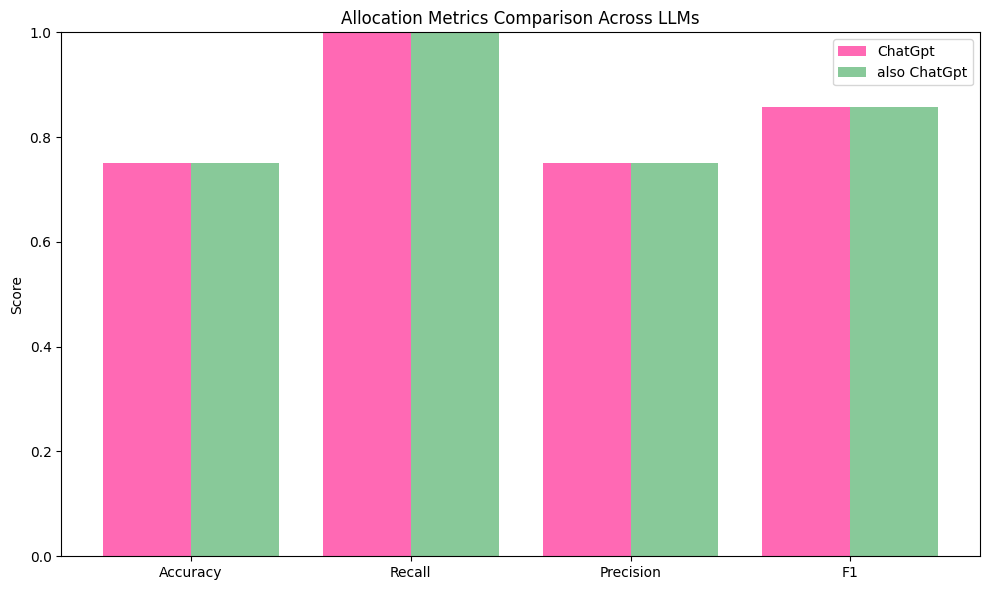

In [56]:
# Test plot_allocation_metrics with a single model
plot_allocation_metrics([allocation_metrics, allocation_metrics], ['ChatGpt', 'also ChatGpt'])

In [ ]:
####### this will be deleted later
def plots3(allocation_values, experimenter_values):    

    allocation_metrics = calculateMetrics(TP, FP, FN)

    # Metrics for Experimenter (multi-class)
    experimenter_metrics = calculateMetrics(TPE_sum, FPE_sum, FNE_sum)

    # Prepare data for plotting
    labels = ['Accuracy', 'Recall', 'Precision', 'F1']
    allocation_values = [allocation_metrics[label] for label in labels]
    experimenter_values = [experimenter_metrics[label] for label in labels]

    x = range(len(labels))
    width = 0.35

    plt.figure(figsize=(8, 5))
    plt.bar([i - width/2 for i in x], allocation_values, width, label='Allocation')
    plt.bar([i + width/2 for i in x], experimenter_values, width, label='Experimenter')

    plt.ylabel('Score')
    plt.title('Evaluation Metrics')
    plt.xticks(x, labels)
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()

# To do :
nexts steps are to add graphics
- check what are the appropriate graphics to match this data
- subplots